## import neccesary libraries and data files

In [1]:
!pip install psycopg2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 5.8 kB/s eta 0:00:0000:0200:03
  Preparing metadata (setup.py) ... done
  Created wheel for psycopg2: filename=psycopg2-2.9.9-cp39-cp39-macosx_10_9_x86_64.whl size=133936 sha256=161f2b74ed7d7caeb33979704c4ce4ecf1ffb552abf1620b6c110d0cfcba8eaf
  Stored in directory: /Users/isaacige/Library/Caches/pip/wheels/4d/77/79/f0a17b3972dc10befe94b9967d6dbe1de86ec0291b4b8631a4
Successfully built psycopg2


In [1]:
import pandas as pd
import numpy as np
import psycopg2
from psycopg2 import sql
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
gs_df = pd.read_csv('../data/genome-scores.csv')
links_df = pd.read_csv('../data/links.csv')
gt_df = pd.read_csv('../data/genome-tags.csv')
movies_df = pd.read_csv('../data/movies.csv')
ratings_df = pd.read_csv('../data/ratings.csv')
tags_df = pd.read_csv('../data/tags.csv')


In [4]:
gs_df.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [7]:
links_df.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [7]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
gt_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [193]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [194]:
movies_df.nunique()

movieId    62423
title      62325
genres      1639
dtype: int64

In [195]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [196]:
ratings_df.nunique()

userId         162541
movieId         59047
rating             10
timestamp    20115267
dtype: int64

In [9]:
tags_df.nunique()

userId        14592
movieId       45251
tag           73050
timestamp    907730
dtype: int64

In [78]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [37]:
# extract year out
movies_df['year'] = movies_df['title'].apply(lambda x: x.split('(')[-1])
#extract the movie title
movies_df['title'] = movies_df['title'].apply(lambda x: x.split('(')[0])
#clean the year
movies_df['year'] = movies_df['year'].apply(lambda x: x.replace(')', ''))

In [39]:
movies_df.to_csv('data/new_movie.csv', index=False)

In [2]:
db_params = {
    'database': 'movie_db',
    'user': 'postgres',
    'password': 'P@$$w0rd',
    'host' : 'localhost',
    'port' : '5432'
}

In [3]:
conn = psycopg2.connect(**db_params)
cursor = conn.cursor()

In [5]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
# load the csv document as file and insert into the db
with open('../data/links.csv', 'r') as file:
    reader = csv.reader(file) #read the file as reader
    next(reader)    #skip the first row
    try:
        for row in reader:
            cursor.execute(
                f"INSERT INTO links (movieId, imdbId, tmdbId) VALUES (%s, %s, %s)", 
                (row[0], row[1], row[2])
            )
    except Exception as e:
        print(f"Error: {str(e)}")


In [55]:
# load the csv document as file and insert into the db
with open('data/genome-scores.csv', 'r') as file:
    reader = csv.reader(file) #read the file as reader
    next(reader)    #skip the first row
    try:
        for row in reader:
            cursor.execute(
                f"INSERT INTO genome_scores (movieId, tagId, relevance) VALUES (%s, %s, %s)", 
                (row[0], row[1], row[2])
            )
    except Exception as e:
        print(f"Error: {str(e)}")


In [11]:
# load the csv document as file and insert into the db
with open('../data/genome-tags.csv', 'r') as file:
    reader = csv.reader(file) #read the file as reader
    next(reader)    #skip the first row
    try:
        for row in reader:
            cursor.execute(
                f"INSERT INTO genome_tags (tagId, tag) VALUES (%s, %s)", 
                (row[0], row[1])
            )
    except Exception as e:
        print(f"Error: {str(e)}")

In [25]:
# load the csv document as file and insert into the db
with open('../data/tags.csv', 'r') as file:
    reader = csv.reader(file) #read the file as reader
    next(reader)    #skip the first row
    try:
        for row in reader:
            cursor.execute(
                f"INSERT INTO tags (userId, movieId, tag, timestamp) VALUES (%s, %s, %s, to_timestamp(%s))", 
                (row[0], row[1], row[2], row[3])
            )
    except Exception as e:
        print(f"Error: {str(e)}")

In [75]:
movies_df.nunique()

movieId    62423
title      62325
genres      1639
dtype: int64

In [37]:
gs_df.shape

(15584448, 3)

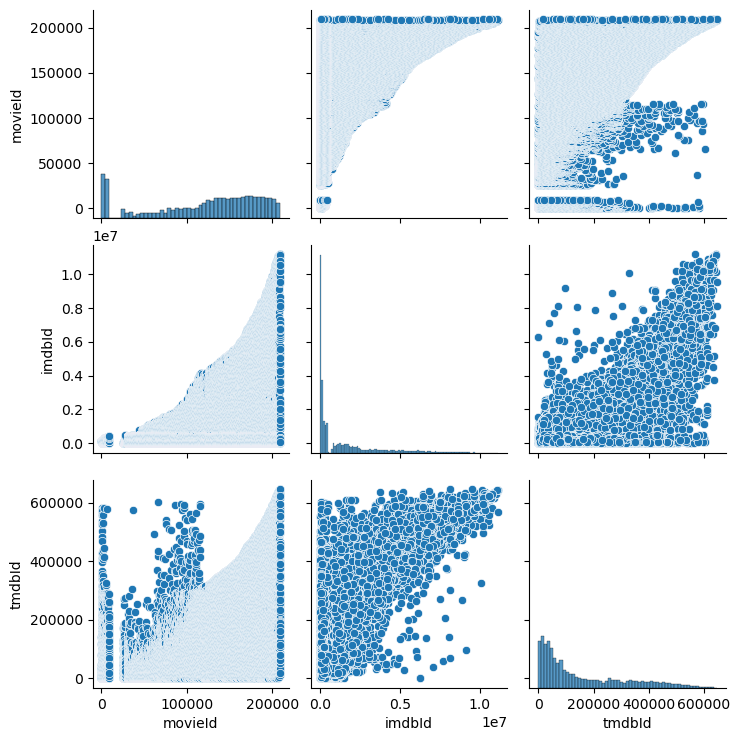

In [32]:
sns.pairplot(links_df)

In [94]:
columns = ['userid', 'rating', 'title', 'genre', 'timestamp']
#columns = ['ratings.userid, ratings.rating, ratings.movieid, movies.title, movies.genre, ratings.timestamp']
#columns = ['r.userid', 'r.rating', 'r.movieid AS rating_movieid', 'm.title', 'm.genre', 'r.timestamp']
movieColumns = ['ReleasedYear', 'Rating_User','Rating','Title','Timestamp']
condition = 'r.movieid = m.movieid'
rating = "ratings"
movie = "movies"

In [151]:
select_query = sql.SQL('SELECT userid, rating, title, genre, timestamp FROM {} AS r LEFT JOIN movies AS m on r.movieId = m.movieId LIMIT 1000').format(
    #sql.SQL(',').join(map(sql.Identifier, columns)),
    sql.Identifier(rating)
)

# f"SELECT userId, movieId, title, rating, genre, timestamp FROM ratings LEFT JOIN movies on ratings.movieId = movies.movieId LIMIT 3"
cursor.execute(select_query)
testData = cursor.fetchall()

In [87]:
final = []
def convertToDate(data):
    for date in data:
        conv = list(date)
        conv[-1] = conv[-1].strftime("%Y-%m-%d %H:%M:%S")
        final.append(conv)
        
    return final

#df['date'] = df['timestamp'].apply(lambda x : x.split()[0])
#df['time'] = df['timestamp'].apply(lambda x : x.split()[1])

In [95]:
def covertToDf(data):
    return pd.DataFrame(data, index=None, columns=movieColumns)

In [96]:
sub = convertToDate(data)
df = covertToDf(sub)

In [97]:
df.head()

,ReleasedYear,Rating_User,Rating,Title,Timestamp
0,2008,1223,3.0,Doubt,2018-11-22 06:45:29
1,2009,1223,4.0,Inglourious Basterds,2018-09-16 02:33:55
2,2009,1223,3.5,Moon,2018-10-12 03:30:39
3,2008,1223,3.5,"Hurt Locker, The",2018-09-16 02:37:48
4,2009,1223,3.0,Up in the Air,2018-11-22 06:40:16


In [109]:
df.groupby(['ReleasedYear', 'Timestamp']).mean().tail(50)

Rating_User  Rating
ReleasedYear      Timestamp                               
2018              2019-01-10 17:30:49       1228.0     3.0
                  2019-01-10 17:31:12       1228.0     4.5
                  2019-01-10 17:32:35       1228.0     3.0
                  2019-02-18 08:51:30       1288.0     4.5
                  2019-02-20 20:40:07       1228.0     3.0
                  2019-02-20 20:43:44       1228.0     4.0
                  2019-02-20 20:45:37       1228.0     3.0
                  2019-02-20 20:46:22       1228.0     4.5
                  2019-02-20 20:50:24       1228.0     3.0
                  2019-03-22 23:59:57       1259.0     3.5
                  2019-03-23 00:12:54       1259.0     4.0
                  2019-05-08 18:46:19       1228.0     3.5
                  2019-05-08 18:47:00       1228.0     3.5
                  2019-05-08 18:48:05       1228.0     3.5
                  2019-05-08 18:49:11       1228.0     3.0
                  2019-05-08 18:51:44       1228.0     3.5
                  2019-05-08 18:53:48       1228.0     3.0
                  2019-05-08 18:54:34       1228.0     3.0
                  2019-05-08 18:56:56       1228.0     3.0
                  2019-05-08 19:02:50       1228.0     3.0
                  2019-05-21 18:19:19       1228.0     3.5
                  2019-06-06 18:26:47       1228.0     4.0
                  2019-06-08 03:56:19       1280.0     5.0
                  2019-06-08 04:00:53       1280.0     5.0
                  2019-06-11 02:52:24       1280.0     4.0
                  2019-06-11 02:53:00       1280.0     4.5
                  2019-07-13 18:25:46       1228.0     3.5
                  2019-07-21 15:51:08       1228.0     3.0
                  2019-09-05 19:08:57       1228.0     4.5
                  2019-09-05 19:16:46       1228.0     3.5
                  2019-10-14 18:45:38       1228.0     4.5
2019              2019-02-20 20:41:00       1228.0     3.5
                  2019-02-20 20:41:28       1228.0     3.0
                  2019-02-20 20:49:38       1228.0     3.0
                  2019-05-08 18:53:02       1228.0     3.0
                  2019-05-08 18:53:11       1228.0     3.5
                  2019-05-08 18:53:26       1228.0     4.0
                  2019-05-08 19:03:58       1228.0     3.0
                  2019-05-08 19:04:27       1228.0     3.0
                  2019-06-08 03:57:03       1280.0     5.0
                  2019-06-26 19:05:32       1228.0     3.5
                  2019-07-13 18:36:45       1228.0     3.5
                  2019-09-29 14:08:30       1228.0     4.5
                  2019-09-29 14:09:34       1228.0     3.0
                  2019-09-29 14:12:17       1228.0     3.5
Black Mirror      2018-09-29 12:33:46       1228.0     5.0
Moonlight         2017-04-29 16:19:47       1281.0     2.5
Nocturnal Animals 2017-04-29 16:19:47       1281.0     1.5
Paterson          2017-04-29 16:19:47       1281.0     3.0
The OA            2017-02-01 06:13:28       1232.0     4.5

In [33]:
max_rating = df.groupby('userid').mean()

In [34]:
max_rating

,rating
userid,
1,3.814286
2,3.630435
3,3.697409
4,3.638889


In [43]:
df[['rating', 'userid']].groupby('userid').mean()

,rating
userid,
1,3.814286
2,3.630435
3,3.697409
4,3.638889


In [116]:
df['timestamp'].head()

0    2006-05-17 16:34:04
1    2006-05-17 13:26:57
2    2006-05-17 13:27:08
3    2006-05-17 16:13:40
4    2006-05-17 13:21:50
Name: timestamp, dtype: object

In [156]:
df['date'] = df['timestamp'].apply(lambda x : x.split()[0])
df['time'] = df['timestamp'].apply(lambda x : x.split()[1])

In [146]:
df['timestamp'].apply(lambda x : x.split())
#temp.apply(lambda d : d.split(','))

0      16:34:04
1      13:26:57
2      13:27:08
3      16:13:40
4      13:21:50
         ...   
995    22:09:12
996    22:15:11
997    22:45:54
998    22:10:28
999    22:41:28
Name: timestamp, Length: 1000, dtype: object

In [143]:
test = ['userid', 'rating']
t1 = test[0]
t2 = test[1]
print(t2)

rating


In [83]:
conn = psycopg2.connect(**db_params)
cursor = conn.cursor()

In [64]:
conn.commit()
cursor.close()
conn.close()

In [103]:
cursor.close()

In [86]:
c = ['year', 'userid', 'rating', 'timestamp', 'relevance']
select_query = sql.SQL('SELECT year, r.userid, rating, m.title, r.timestamp FROM {} AS m JOIN ratings AS r ON r.movieId = m.movieId   LIMIT 10000').format(
    #sql.SQL(',').join(map(sql.Identifier, c)),
    sql.Identifier(movie)
)
cursor.execute(select_query)
data = cursor.fetchall()
# JOIN tags as t ON t.movieId = t.movieId  JOIN genome_scores AS gs ON gs.movieId = gs.movieId

In [93]:
print(data)

[('2008', 1223, 3.0, 'Doubt ', datetime.datetime(2018, 11, 22, 6, 45, 29)), ('2009', 1223, 4.0, 'Inglourious Basterds ', datetime.datetime(2018, 9, 16, 2, 33, 55)), ('2009', 1223, 3.5, 'Moon ', datetime.datetime(2018, 10, 12, 3, 30, 39)), ('2008', 1223, 3.5, 'Hurt Locker, The ', datetime.datetime(2018, 9, 16, 2, 37, 48)), ('2009', 1223, 3.0, 'Up in the Air ', datetime.datetime(2018, 11, 22, 6, 40, 16)), ('2010', 1223, 2.5, 'Inception ', datetime.datetime(2018, 9, 16, 2, 34, 44)), ('2010', 1223, 4.0, 'Town, The ', datetime.datetime(2018, 9, 16, 3, 23, 26)), ('2010', 1223, 3.5, 'True Grit ', datetime.datetime(2018, 9, 16, 2, 39, 35)), ('2011', 1223, 4.5, 'Drive ', datetime.datetime(2018, 9, 16, 3, 21, 45)), ('2012', 1223, 2.0, 'The Hunger Games ', datetime.datetime(2018, 10, 22, 4, 20, 30)), ('2012', 1223, 3.5, 'Dark Knight Rises, The ', datetime.datetime(2018, 10, 22, 4, 20, 41)), ('2011', 1223, 3.5, 'Girl with the Dragon Tattoo, The ', datetime.datetime(2018, 9, 16, 3, 23, 35)), ('2012

In [70]:
print(data)

[('1995', 84, 3.5, 'Toy Story ', datetime.datetime(2016, 12, 13, 15, 24, 38)), ('1995', 84, 3.5, 'Jumanji ', datetime.datetime(2016, 12, 13, 15, 24, 38)), ('1995', 84, 3.5, 'Grumpier Old Men ', datetime.datetime(2016, 12, 13, 15, 24, 38)), ('1995', 84, 3.5, 'Waiting to Exhale ', datetime.datetime(2016, 12, 13, 15, 24, 38)), ('1995', 84, 3.5, 'Father of the Bride Part II ', datetime.datetime(2016, 12, 13, 15, 24, 38)), ('1995', 84, 3.5, 'Heat ', datetime.datetime(2016, 12, 13, 15, 24, 38)), ('1995', 84, 3.5, 'Sabrina ', datetime.datetime(2016, 12, 13, 15, 24, 38)), ('1995', 84, 3.5, 'Tom and Huck ', datetime.datetime(2016, 12, 13, 15, 24, 38)), ('1995', 84, 3.5, 'Sudden Death ', datetime.datetime(2016, 12, 13, 15, 24, 38)), ('1995', 84, 3.5, 'GoldenEye ', datetime.datetime(2016, 12, 13, 15, 24, 38)), ('1995', 84, 3.5, 'American President, The ', datetime.datetime(2016, 12, 13, 15, 24, 38)), ('1995', 84, 3.5, 'Dracula: Dead and Loving It ', datetime.datetime(2016, 12, 13, 15, 24, 38)), (

In [84]:
statement = sql.SQL('SELECT * from ratings AS r JOIN movies AS m ON m.movieId = r.movieId LIMIT 1000')
cursor.execute(statement)
st = cursor.fetchall()

In [85]:
st

[(110977,
  836,
  1968,
  5.0,
  datetime.datetime(1999, 10, 23, 0, 47, 28),
  1880,
  1968,
  'Breakfast Club, The ',
  'Comedy|Drama',
  '1985'),
 (110978,
  836,
  1969,
  2.0,
  datetime.datetime(1999, 10, 23, 0, 54, 55),
  1881,
  1969,
  "Nightmare on Elm Street 2: Freddy's Revenge, A ",
  'Horror',
  '1985'),
 (110979,
  836,
  1970,
  4.0,
  datetime.datetime(1999, 10, 23, 0, 54, 55),
  1882,
  1970,
  'Nightmare on Elm Street 3: Dream Warriors, A ',
  'Horror|Thriller',
  '1987'),
 (110980,
  836,
  1971,
  4.0,
  datetime.datetime(1999, 10, 23, 0, 54, 55),
  1883,
  1971,
  'Nightmare on Elm Street 4: The Dream Master, A ',
  'Horror|Thriller',
  '1988'),
 (110981,
  836,
  1972,
  4.0,
  datetime.datetime(1999, 10, 23, 0, 54, 55),
  1884,
  1972,
  'Nightmare on Elm Street 5: The Dream Child, A ',
  'Horror',
  '1989'),
 (110982,
  836,
  1987,
  3.0,
  datetime.datetime(1999, 10, 23, 0, 57, 21),
  1899,
  1987,
  'Prom Night ',
  'Horror',
  '1980'),
 (110983,
  836,
  198